In [2]:
%matplotlib inline

## [Mean Shift](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.MeanShift.html#sklearn.cluster.MeanShift)
- Looks for blobs in a seemingly smooth density of samples. Centroid-based.
- Centroids are updated using $x_i^{t+1} = m(x_i^t)$, where N(x) is the neighborhood of samples within a given distance, and m is a *mean shift* vector that points towards a region of maximum increase in point density:
$m(x_i) = \frac{\sum_{x_j \in N(x_i)}K(x_j - x_i)x_j}{\sum_{x_j \in N(x_i)}K(x_j - x_i)}$
- MS automatically sets the number of clusters.

number of estimated clusters : 3


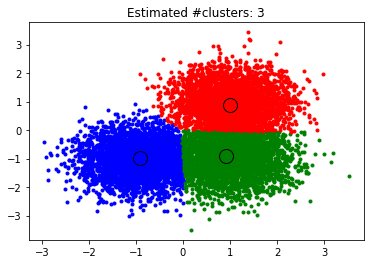

In [3]:
import numpy as np
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.datasets import make_blobs

centers   = [[1, 1], [-1, -1], [1, -1]]
X, _      = make_blobs(n_samples=10000, centers=centers, cluster_std=0.6)
bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=500)
ms        = MeanShift(bandwidth=bandwidth, 
                      bin_seeding=True)
ms.fit(X)
labels          = ms.labels_
cluster_centers = ms.cluster_centers_
labels_unique   = np.unique(labels)
n_clusters_     = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)

import matplotlib.pyplot as plt
from itertools import cycle

plt.figure(1)
plt.clf()
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')

for k, col in zip(range(n_clusters_), colors):
    my_members     = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(X[my_members, 0], 
             X[my_members, 1], col + '.')
    plt.plot(cluster_center[0], 
             cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)

plt.title('Estimated #clusters: %d' % n_clusters_)
plt.show()